In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
pd.options.display.max_columns=999
df = pd.read_csv('Untitled spreadsheet - Sheet1.csv')
df = df.drop('Unnamed: 3', 1)
df = df.dropna()
borders = []
for i in df['Borders']:
    borders.append(i.split('/'))
within = []
for i in df['Within']:
    within.append(i.split('/'))
df['Borders'] = borders
df['Within'] = within
df2 = df.drop(0)
borders = []
for n in df.index:
    x = df.loc[n][0]
    for i in df.loc[n][-1]:
        borders.append([x,i])
borders = pd.DataFrame(borders)
borders = borders.drop([0,1]).reset_index().drop('index',1)
# quality of life indicators
cpi = pd.read_csv('cpi.csv')
cpi = cpi[['Country','2015 cpi']]
cpi = cpi.replace('-',np.nan)
cpi['2015 cpi'] = [float(x) for x in cpi['2015 cpi']]
edbi = pd.read_csv('edbiscores.csv')
edbi=edbi.replace('Russian Federation','Russia')
homicide = pd.read_csv('homicide.csv')
pfi = pd.read_csv('pfi.csv')[['Country','Score']]
pfi.columns = ['Country','2018 pfi']
pfi['2018 pfi'] = [float(x) for x in pfi['2018 pfi']]
homicide.columns = ['Country','Region','Subregion','Homicide Rate','Homicide County','Year','Source']
qol = pd.merge(cpi,pfi,on='Country')
qol = pd.merge(qol,edbi,on='Country')
qol = pd.merge(qol, homicide, on='Country')
qol['score'] = qol['2015 cpi'] / qol['2018 pfi'] * qol['DB 2019']
qol.head()
#GDP and Population
data = pd.read_csv('world_indicators_all_years.csv')
data = data[data['Time'] == '2016']
data = data.replace('Iran, Islamic Rep.','Iran').replace('Korea, Dem. People’s Rep.',"Democratic People's Republic of Korea").replace('Lao PDR','Laos').replace('Korea, Rep.','Korea,South').replace('Macedonia, FYR','Macedonia').replace('Myanmar','Myanmar (Burma)').replace('Russian Federation','Russia').replace('Slovak Republic','Slovakia').replace('Syrian Arab Republic','Syria').replace('Venezuela, RB','Venezuela').replace('Yemen, Rep.','Yemen')
data1 = data[['Country Name', 'Population, total [SP.POP.TOTL]','Population growth (annual %) [SP.POP.GROW]','GDP (current US$) [NY.GDP.MKTP.CD]', 'GDP per capita (current US$) [NY.GDP.PCAP.CD]']]
data1 = data1.replace('..',np.nan)
for x in [*data1.columns][1:]:
    data1[x] = [float(i) for i in data1[x]]
data1['Population, total [SP.POP.TOTL]'] = [float(n) for n in data1['Population, total [SP.POP.TOTL]']]
data1 = pd.merge(qol,data1,left_on='Country',right_on='Country Name')
trust=pd.read_csv('self-reported-trust-attitudes.csv')
trust=trust[trust['Year']==2014]
data1=pd.merge(data1,trust,left_on='Country',right_on='Entity').drop(['Entity','Code','Year_y'],1)
#treaties
schengen = ['Austria','Belgium','Czech Republic','Denmark','Estonia','Finland','France','Germany','Greece','Hungary','Iceland','Italy','Latvia','Liechtenstein','Lithuania','Luxembourg','Malta','Netherlands','Monaco','Norway','Poland','Portugal','San Marino','Slovakia','Slovenia','Spain','Sweden','Switzerland','Vatican City']
common = ['Ireland','United Kingdom']
unionstate = ['Russia','Belarus']
peaceandfriendship = ['India','Bhutan','Nepal']
ca4 = ['El Salvador','Honduras','Guatemala','Nicaragua']
tasman = ['Australia','New Zealand']
andean = ['Bolivia','Ecuador','Colombia','Peru']
caricom = ['Antigua and Barbuda','Barbados', 'Belize', 'Dominica', 'Grenada','Guyana','Jamaica','Saint Kitts and Nevis','Saint Lucia','Saint Vincent and the Grenadines','Suriname','Trinidad and Tobago']
gcc = ['Saudi Arabia','Oman','Kuwait','United Arab Emirates','Bahrain']
eac = ['Kenya','Tanzania','Uganda','South Sudan','Rwanda','Burundi']
table = [schengen+common+unionstate+peaceandfriendship+ca4+tasman+andean+caricom+gcc+eac,['Schengen'] * len(schengen) + ['Common'] * len(common) + ['Union State'] * len(unionstate) + ['Peace and Friendship'] * len(peaceandfriendship) + ['Central America 4'] * len(ca4) + ['Trans-Tasman Agreement'] * len(tasman) + ['Andean Community'] * len(andean) + len(caricom) * ['Caricom'] + len(gcc) * ['Gulf Cooperation Council'] + ['East African Community'] * len(eac)]
treaties = pd.DataFrame(table).transpose()
treaties.columns = ['Country','Treaty']
notreaty = pd.DataFrame([*set(treaties['Country'])^set(data1['Country Name'])])
notreaty['Treaty'] = None
notreaty.columns = ['Country','Treaty']
treaties = pd.concat([notreaty,treaties])
data1 = pd.merge(data1,treaties)
#bring it all together
gini=pd.read_csv('gini.csv').iloc[:217].replace('..',np.nan)
data1['gini']=gini[['1990 [YR1990]', '2000 [YR2000]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]']].astype(float).mean(axis=1)
test1 = pd.merge(borders,data1,left_on=0,right_on='Country Name')
test1.columns = ['Country 1','Country 2','C','2015 cpi', '2018 pfi', 'DB 2018',
       'DB 2019', 'Region', 'Subregion', 'Homicide Rate', 'Homicide County',
       'Year', 'Source', 'score', 'Country Name','Population 1','Population growth 1','GDP 1',
                 'GDP per capita 1','trust1','Treaty 1','gini1']
test1['Country 2'] = [s.rstrip(" ").lstrip(' ') for s in test1['Country 2']]
test2 = pd.merge(test1,data1,left_on='Country 2',right_on='Country Name')
#More statistics
test2.columns = ['Country 1', 'Country 2', 'C', '2015 cpi_x', '2018 pfi_x', 'DB 2018_x', 'DB 2019_x', 'Region_x', 'Subregion_x',
       'Homicide Rate_x', 'Homicide County_x', 'Year_x', 'Source_x', 'score_x',
       'Country Name_x', 'Population 1', 'Population growth 1', 'GDP 1',
       'GDP per capita 1','trust1','Treaty 1','gini1', 'Country', '2015 cpi_y', '2018 pfi_y', 'DB 2018_y', 'DB 2019_y', 'Region_y', 'Subregion_y',
       'Homicide Rate_y', 'Homicide County_y', 'Year_y', 'Source_y', 'score_y',
       'Country Name_y', 'Population 2',
       'Population growth 2','GDP 2','GDP per capita 2','trust2','Treaty 2','gini2']
test2['Population difference'] = test2['Population 1'] / test2['Population 2']
test2['Population growth difference'] = test2['Population growth 1']/ test2['Population growth 2']
test2['GDP difference'] = test2['GDP 1'] / test2['GDP 2']
test2['GDP per capita difference'] = test2['GDP per capita 1'] / test2['GDP per capita 2']
df1 = test2
test2['Population difference'] = [1/x if x > 1 else x for x in test2['Population difference'] ]
test2['Population growth difference'] = [1/x if x > 1 else x for x in test2['Population growth difference']]
test2['GDP difference'] = [1/x if x > 1 else x for x in test2['GDP difference']]
test2['GDP per capita difference'] = [1/x if x > 1 else x for x in test2['GDP per capita difference']]
test2 = pd.merge(test2,df2, left_on='Country 1', right_on='Name of country').drop('Borders',1)
test2['GDP product'] = test2['GDP 1'] *test2['GDP 2']
test2['GDP per capita in both'] = (test2['GDP 1'] + test2['GDP 2']) / (test2['Population 1'] + test2['Population 2'])
test2 = test2.drop_duplicates('GDP product').reset_index()
df1['cpi difference'] = df1['2015 cpi_x'] / df1['2015 cpi_y']
#df1['cpi difference'] = [1/x if x > 1 for x in df1['cpi difference'] else x]
df1['GDP sum'] = df1['GDP 1']+df1['GDP 2']
df1['cpi difference'] = [1/x if x > 1 else x for x in df1['cpi difference']]
df1['db difference'] = df1['DB 2019_x'] / df1['DB 2019_y']
df1['db difference'] = [1/x if x > 1 else x for x in df1['db difference']]
df1['pfi difference'] = df1['2018 pfi_x'] / df1['2018 pfi_y']
df1['pfi difference'] = [1/x if x > 1 else x for x in df1['pfi difference']]
df1['homicide difference'] = df1['Homicide Rate_x'] / df1['Homicide Rate_y']
df1['homicide difference'] = [1/x if x > 1 else x for x in df1['homicide difference']]
df1['trust difference'] = df1['trust1'] / df1['trust2']
df1['trust difference'] = [1/x if x > 1 else x for x in df1['trust difference']]
df1['Country Similarity'] = (df1['cpi difference']+df1['db difference']+df1['pfi difference']+df1['homicide difference']) /4
df1['average cpi'] = df1[['2015 cpi_x','2015 cpi_y']].mean(axis=1)
df1['average db'] = df1[['DB 2019_x','DB 2019_y']].mean(axis=1)
df1['average pfi'] = df1[['2018 pfi_x','2018 pfi_y']].mean(axis=1)
df1['average homicide'] = df1[['Homicide Rate_x','Homicide Rate_y']].mean(axis=1)
df1['average trust'] = df1[['trust1','trust2']].mean(axis=1)
df1['Border Status'] = np.where(df1['Treaty 1'] == df1['Treaty 2'], 'Open', 'Closed')
df1['Combined Population'] = df1['Population 1'] + df1['Population 2']
df1['GDP per capita']=df1['GDP sum']/df1['Combined Population']
df1['viability'] = df1['average cpi'] * df1['average db'] / (df1['average pfi'] * df1['average homicide'])
df1['viability2'] = df1['average cpi'] * df1['average db'] *df1['GDP per capita']/ (df1['average pfi'] * df1['average homicide'])
df1 = df1.drop_duplicates('Combined Population').sort_values('viability', ascending = False).reset_index().drop('index',1)
df1['Status']=df1['Border Status'].replace('Open',1).replace('Closed',0)
df1['worse cpi']=df1[['2015 cpi_y','2015 cpi_x']].min(axis=1)
df1['worse pfi']=df1[['2018 pfi_x','2018 pfi_x']].max(axis=1)
df1['worse DB']=df1[['DB 2018_y','DB 2018_x']].min(axis=1)
df1['worse homicide']=df1[['Homicide Rate_y','Homicide Rate_x']].max(axis=1)
df1['better cpi']=df1[['2015 cpi_y','2015 cpi_x']].max(axis=1)
df1['better pfi']=df1[['2018 pfi_x','2018 pfi_x']].min(axis=1)
df1['better DB']=df1[['DB 2018_y','DB 2018_x']].max(axis=1)
df1['better homicide']=df1[['Homicide Rate_y','Homicide Rate_x']].min(axis=1)
df1.head()

Country 1    Country 2         C  2015 cpi_x  2018 pfi_x  DB 2018_x  \
0   Germany  Netherlands   Germany        81.0       14.39      78.90   
1   Germany       Poland   Germany        81.0       14.39      78.90   
2  Malaysia    Singapore  Malaysia        50.0       47.41      78.03   
3   Armenia      Georgia   Armenia        35.0       29.99      73.31   
4   Georgia   Azerbaijan   Georgia        52.0       27.34      82.80   

   DB 2019_x Region_x         Subregion_x  Homicide Rate_x  Homicide County_x  \
0      78.90   Europe      Western Europe             1.18              963.0   
1      78.90   Europe      Western Europe             1.18              963.0   
2      80.60     Asia  South-Eastern Asia             2.11              627.0   
3      75.37     Asia        Western Asia             2.98               87.0   
4      83.28     Asia        Western Asia             0.99               39.0   

   Year_x          Source_x     score_x Country Name_x  Population 1  \
0  2016.0         UNSDC/CTS  444.120917        Germany    82667685.0   
1  2016.0         UNSDC/CTS  444.120917        Germany    82667685.0   
2  2013.0      UNSDC/WHO/NP   85.003164       Malaysia    31187265.0   
3  2016.0        TSMNEE/CTS   87.960987        Armenia     2924816.0   
4  2016.0  UNSDC/TSMNEE/CTS  158.396489        Georgia     3719300.0   

   Population growth 1         GDP 1  GDP per capita 1    trust1  Treaty 1  \
0             1.193867  3.477796e+12      42069.597987  42.03041  Schengen   
1             1.193867  3.477796e+12      42069.597987  42.03041  Schengen   
2             1.499323  2.965359e+11       9508.237750   8.53846      None   
3             0.269302  1.057230e+10       3614.688357  10.01821      None   
4             0.059168  1.437802e+10       3865.785693   8.81864      None   

       gini1      Country  2015 cpi_y  2018 pfi_y  DB 2018_y  DB 2019_y  \
0  32.633333  Netherlands        87.0       10.01      76.03      76.04   
1  32.633333       Poland        62.0       26.59      77.31      76.95   
2  53.300000    Singapore        85.0       50.95      84.97      85.24   
3  27.600000      Georgia        52.0       27.34      82.80      83.28   
4        NaN   Azerbaijan        29.0       59.73      71.54      78.64   

  Region_y         Subregion_y  Homicide Rate_y  Homicide County_y  Year_y  \
0   Europe      Western Europe             0.55               94.0  2016.0   
1   Europe      Eastern Europe             0.67              256.0  2016.0   
2     Asia  South-Eastern Asia             0.32               18.0  2016.0   
3     Asia        Western Asia             0.99               39.0  2016.0   
4     Asia        Western Asia             2.14              208.0  2016.0   

           Source_y     score_y Country Name_y  Population 2  \
0           NSO/CTS  660.887113    Netherlands    17018408.0   
1     EUR/UNSDC/CTS  179.424596         Poland    37948016.0   
2      UNSDC/NP/CTS  142.206084      Singapore     5607283.0   
3  UNSDC/TSMNEE/CTS  158.396489        Georgia     3719300.0   
4         UNSDC/CTS   38.181149     Azerbaijan     9762274.0   

   Population growth 2         GDP 2  GDP per capita 2    trust2  Treaty 2  \
0             0.462244  7.772275e+11      45669.814802  66.17570  Schengen   
1            -0.101129  4.713644e+11      12421.318909  22.25673  Schengen   
2             1.297436  2.969757e+11      52962.491569  38.51626      None   
3             0.059168  1.437802e+10       3865.785693   8.81864      None   
4             1.163574  3.784772e+10       3876.936433  16.16766      None   

   gini2  Population difference  Population growth difference  GDP difference  \
0    NaN               0.205865                      0.387182        0.223483   
1    NaN               0.459043                    -11.805342        0.135535   
2   43.3               0.179794                      0.865348        0.998519   
3    NaN               0.786389                      0.219710        0.73531

In [3]:
def RFRegressor(y, df):
    df=df._get_numeric_data().dropna()
    X = df.drop([y], 1)
    y = df[y]
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor()
    rf.fit(X, y)
    names = X.dtypes.index
    print("Features sorted by their score:")
    print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), 
                 reverse=True))
    print(rf.score(X,y))
RFRegressor('Status',df1)

Features sorted by their score:
[(0.2203, 'trust2'), (0.1864, 'better cpi'), (0.1695, 'Population difference'), (0.1356, 'GDP per capita difference'), (0.1186, 'db difference'), (0.0678, 'average trust'), (0.0508, '2015 cpi_y'), (0.0169, 'cpi difference'), (0.0169, 'better homicide'), (0.0169, 'Homicide Rate_y'), (0.0, 'worse pfi'), (0.0, 'worse homicide'), (0.0, 'worse cpi'), (0.0, 'worse DB'), (0.0, 'viability2'), (0.0, 'viability'), (0.0, 'trust1'), (0.0, 'trust difference'), (0.0, 'score_y'), (0.0, 'score_x'), (0.0, 'pfi difference'), (0.0, 'homicide difference'), (0.0, 'gini2'), (0.0, 'gini1'), (0.0, 'better pfi'), (0.0, 'better DB'), (0.0, 'average pfi'), (0.0, 'average homicide'), (0.0, 'average db'), (0.0, 'average cpi'), (0.0, 'Year_y'), (0.0, 'Year_x'), (0.0, 'Population growth difference'), (0.0, 'Population growth 2'), (0.0, 'Population growth 1'), (0.0, 'Population 2'), (0.0, 'Population 1'), (0.0, 'Homicide Rate_x'), (0.0, 'Homicide County_y'), (0.0, 'Homicide County_x'),

In [4]:
RFRegressor('Status',df1[['Status','db difference','GDP per capita difference','trust difference','cpi difference','pfi difference','homicide difference']])

Features sorted by their score:
[(0.3419, 'GDP per capita difference'), (0.2126, 'db difference'), (0.169, 'cpi difference'), (0.1412, 'pfi difference'), (0.0804, 'homicide difference'), (0.0549, 'trust difference')]
0.8544198198198198


In [5]:
RFRegressor('trust difference',df1[['Status','db difference','GDP per capita difference','trust difference','cpi difference','pfi difference','homicide difference']])

Features sorted by their score:
[(0.2698, 'GDP per capita difference'), (0.2036, 'cpi difference'), (0.1899, 'pfi difference'), (0.1699, 'homicide difference'), (0.1618, 'db difference'), (0.005, 'Status')]
0.803918243665896


In [6]:
RFRegressor('pfi difference',df1[['Status','db difference','GDP per capita difference','trust difference','cpi difference','pfi difference','homicide difference']])

Features sorted by their score:
[(0.2437, 'cpi difference'), (0.2183, 'GDP per capita difference'), (0.1953, 'trust difference'), (0.1878, 'homicide difference'), (0.1499, 'db difference'), (0.005, 'Status')]
0.8568344393289111


In [7]:
RFRegressor('average pfi',df1[['Status','average pfi','average db','GDP per capita','average trust','average cpi','average homicide']])

Features sorted by their score:
[(0.4167, 'average cpi'), (0.2886, 'average trust'), (0.1064, 'average db'), (0.0975, 'average homicide'), (0.089, 'GDP per capita'), (0.0018, 'Status')]
0.8935048694298643


In [8]:
RFRegressor('average trust',df1[['Status','average pfi','average db','GDP per capita','average trust','average cpi','average homicide']])

Features sorted by their score:
[(0.5154, 'average pfi'), (0.2084, 'average homicide'), (0.1065, 'average cpi'), (0.0824, 'average db'), (0.0791, 'GDP per capita'), (0.0082, 'Status')]
0.9407629680135391


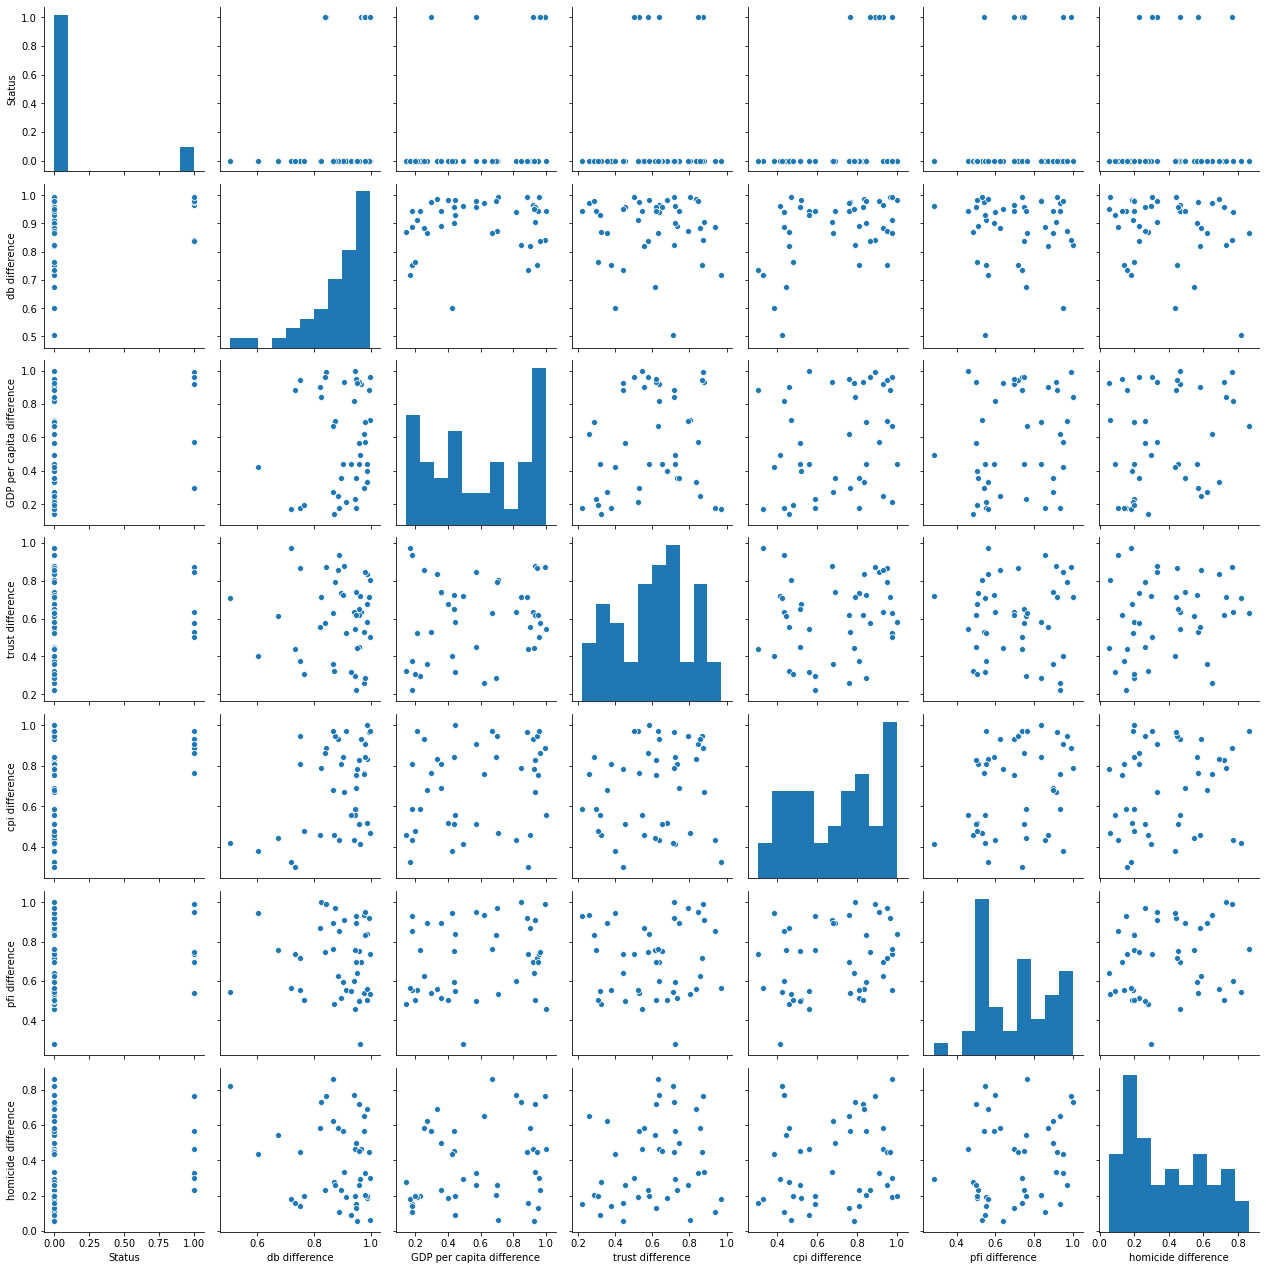

In [9]:
sns.pairplot(df1[['Status','db difference','GDP per capita difference','trust difference','cpi difference','pfi difference','homicide difference']])

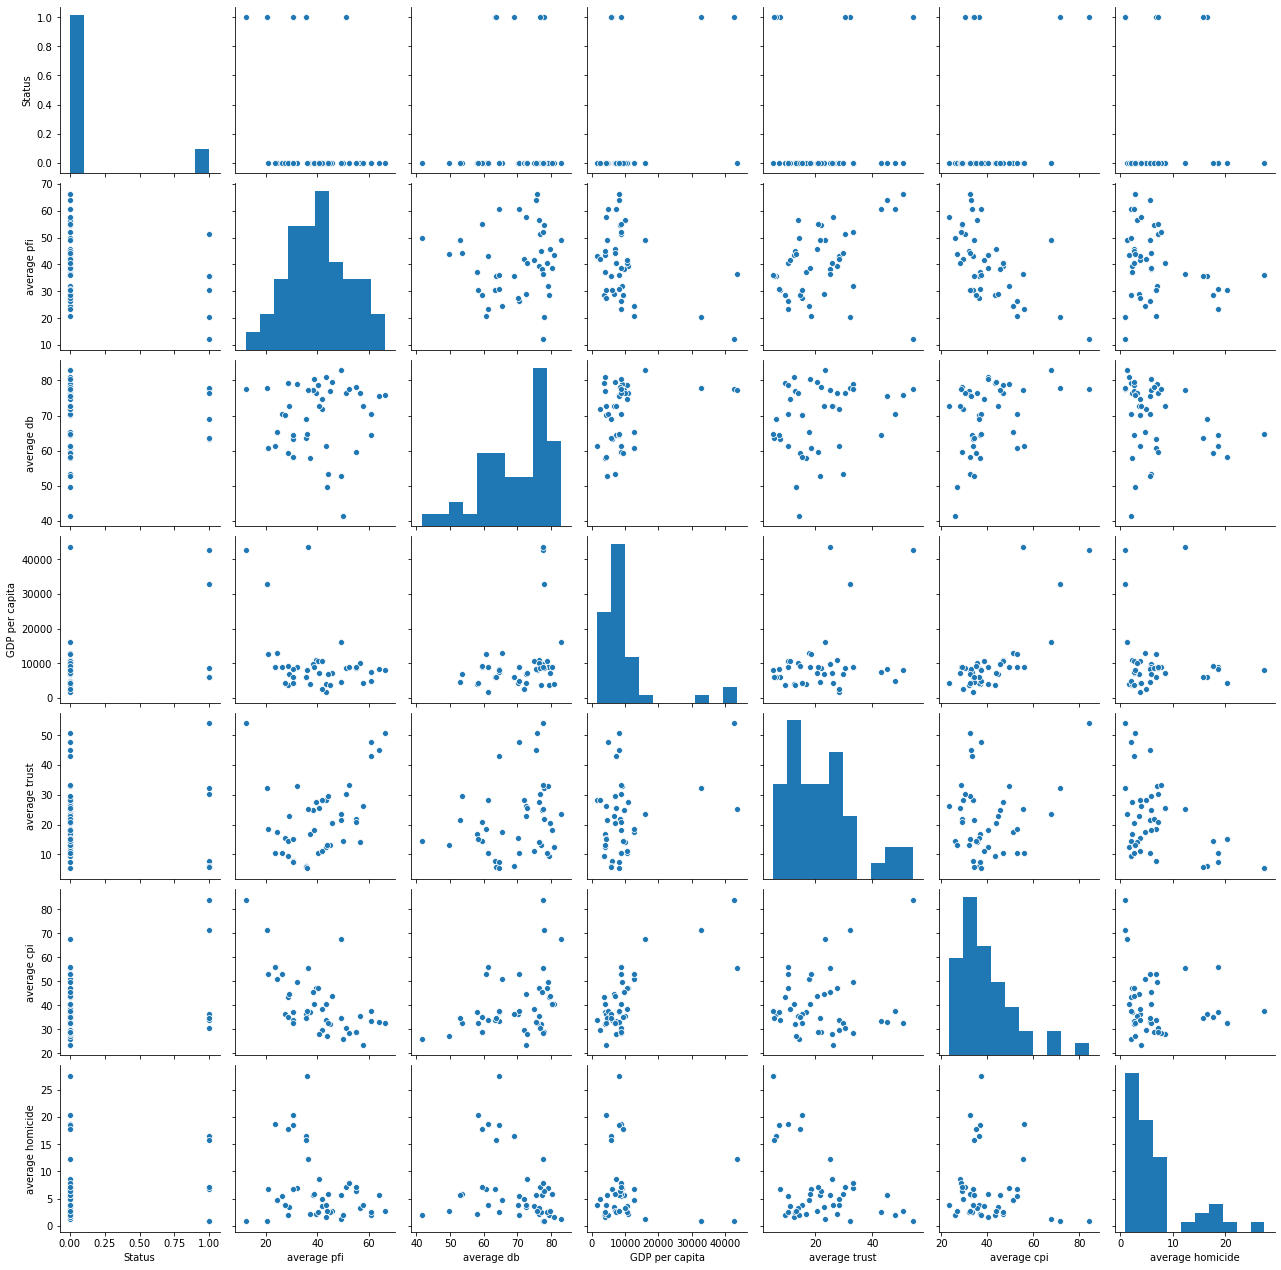

In [10]:
sns.pairplot(df1[['Status','average pfi','average db','GDP per capita','average trust','average cpi','average homicide']])

In [11]:
px.scatter(df1,x='GDP per capita',y='viability',color='Status',hover_data=['Country 1','Country 2'],color_continuous_scale=px.colors.sequential.Bluered_r)